In [180]:
using Revise
include("src/update.jl")

makeDistrib (generic function with 1 method)

In [181]:
M = Model(N=10,T=8,γp=0.15,λp=0.2,distribution=Dirac(1),dilution=1.0);

In [182]:
pop_dynamics!(M, iterations=200)

In [183]:
using Plots
N, T = popsize(M), M.T
omarg2D = fill(0.0, 0:T+1, 0:T+1)
for i in 1:N
    for t in 0:T+1
        omarg2D[t, M.τbelief[i]] += M.belief[t,i]/N
    end
end
marg2D = omarg2D.parent;

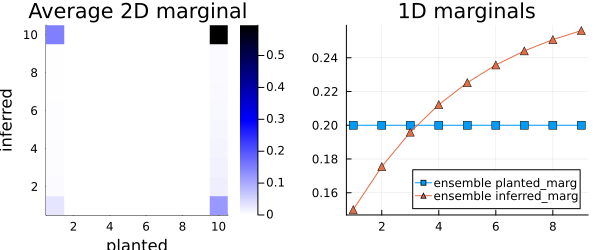

In [184]:
pheat = heatmap((marg2D),c=[:white,:blue,:black],xlabel="planted",ylabel="inferred",title="Average 2D marginal")
p0 = plot(cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1),marker=:square,label="ensemble planted_marg",title="1D marginals")
p0 = plot!(cumsum(sum(marg2D,dims=2)[1:end-1],dims=1),marker=:utriangle,label="ensemble inferred_marg",legend=:bottomright)
plot(pheat,p0,size=(600,250))

In [185]:
[cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1) cumsum(sum(marg2D,dims=2)[1:end-1],dims=1)]

9×2 Matrix{Float64}:
 0.2  0.15
 0.2  0.1755
 0.2  0.1959
 0.2  0.21222
 0.2  0.225276
 0.2  0.235721
 0.2  0.244077
 0.2  0.250761
 0.2  0.256109

In [186]:
cumsum(M.belief[:,1])

10-element OffsetArray(::Vector{Float64}, 0:9) with eltype Float64 with indices 0:9:
 0.14999999999999997
 0.1755
 0.1958999999999999
 0.2122199999999999
 0.22527599999999992
 0.2357208
 0.24407664
 0.25076131200000007
 0.2561090496000001
 1.0

In [187]:
M.μ[:,:,1]

10×2 OffsetArray(::Matrix{Float64}, 0:9, 0:1) with eltype Float64 with indices 0:9×0:1:
 1.0       1.0
 0.97      1.0
 0.946     0.97
 0.9268    0.946
 0.91144   0.9268
 0.899152  0.91144
 0.889322  0.899152
 0.881457  0.889322
 0.875166  0.881457
 0.870133  0.875166

In [188]:
M.μ[:,:,1]

10×2 OffsetArray(::Matrix{Float64}, 0:9, 0:1) with eltype Float64 with indices 0:9×0:1:
 1.0       1.0
 0.97      1.0
 0.946     0.97
 0.9268    0.946
 0.91144   0.9268
 0.899152  0.91144
 0.889322  0.899152
 0.881457  0.889322
 0.875166  0.881457
 0.870133  0.875166